In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
from matplotlib.pyplot import show

In [4]:
import matplotlib.pyplot as plt

In [5]:
a=pd.read_csv("C:/Users/suraj/Documents/Python Classes/PV22/covid_19_data.csv")

In [6]:
a.fillna(method='pad',inplace=True)

C:\Users\suraj\AppData\Local\Temp\ipykernel_15528\3562668113.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  a.fillna(method='pad',inplace=True)


In [7]:
a.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [9]:
# What is the total number of confirmed cases worldwide
a['Confirmed'].sum()

26252051758.0

In [10]:
# How many deaths have been reported globally
a['Deaths'].sum()

624013017.0

In [11]:
# What is the total number of recovered cases worldwide
a['Recovered'].sum()

15450237912.0

In [12]:
# How many countries/regions are represented in the dataset
a['Country/Region'].nunique()

229

Text(0, 0.5, 'Number of Confirmed Cases')

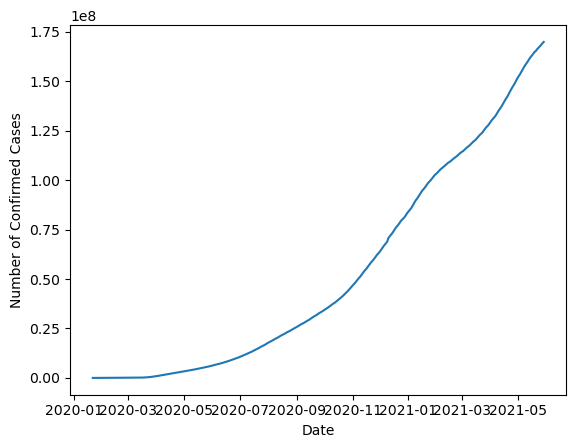

In [13]:
# What is the trend of confirmed cases over time globally
a['ObservationDate'] = pd.to_datetime(a['ObservationDate'])
global_trend = a.groupby('ObservationDate')['Confirmed'].sum().reset_index()
plt.plot(global_trend['ObservationDate'], global_trend['Confirmed'])
plt.xlabel('Date', fontsize=10)
plt.ylabel('Number of Confirmed Cases', fontsize=10)

In [14]:
# Which province/state has reported the highest number of confirmed cases
b = a.groupby('Province/State')['Confirmed'].sum().reset_index()
highest = b.loc[b['Confirmed'].idxmax()]
highest

Province/State    Zuid-Holland
Confirmed         7745979414.0
Name: 735, dtype: object

In [15]:
# Which country/region has the highest number of deaths
b = a.groupby('Country/Region')['Deaths'].sum().reset_index()
highest_deaths = b.loc[b['Deaths'].idxmax()]
highest_deaths

Country/Region             US
Deaths            123303762.0
Name: 214, dtype: object

In [16]:
# How does the number of confirmed cases vary across different provinces/states
b = a.groupby('Province/State')['Confirmed'].sum().reset_index()
b = b.sort_values(by='Confirmed', ascending=False)
b

,Province/State,Confirmed
735,Zuid-Holland,7.745979e+09
88,California,6.969008e+08
365,Maharashtra,6.811869e+08
171,England,6.662275e+08
630,Texas,5.520409e+08
...,...,...
278,Jervis Bay Territory,0.000000e+00
526,Recovered,0.000000e+00
173,External territories,0.000000e+00
404,"Montgomery County, TX",0.000000e+00


Text(0, 0.5, 'Number Of Deaths')

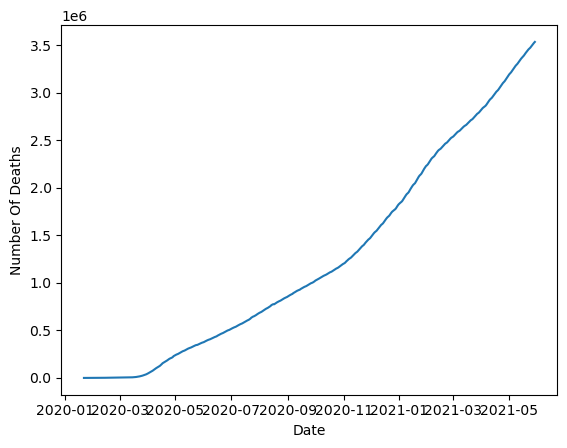

In [17]:
# What is the trend of deaths over time globally
a['ObservationDate'] = pd.to_datetime(a['ObservationDate'])
global_trend = a.groupby('ObservationDate')['Deaths'].sum().reset_index()
plt.plot(global_trend['ObservationDate'], global_trend['Deaths'])
plt.xlabel('Date', fontsize=10)
plt.ylabel('Number Of Deaths', fontsize=10)

In [18]:
# Which country/region has the highest number of recovered cases
b = a.groupby('Country/Region')['Recovered'].sum().reset_index()
highest_recovered = b.loc[b['Recovered'].idxmax()]
highest_recovered

Country/Region           India
Recovered         2900589824.0
Name: 96, dtype: object

In [19]:
# How does the number of recovered cases vary across different countries/regions
b = a.groupby('Country/Region')['Recovered'].sum().reset_index()
b = b.sort_values(by='Recovered', ascending=False)
b

,Country/Region,Recovered
96,India,2.900590e+09
27,Brazil,2.313677e+09
172,Russia,7.907057e+08
212,Turkey,5.641706e+08
214,US,5.033710e+08
...,...,...
166,Puerto Rico,0.000000e+00
168,Republic of Ireland,0.000000e+00
169,Republic of the Congo,0.000000e+00
170,Reunion,0.000000e+00


<Axes: >

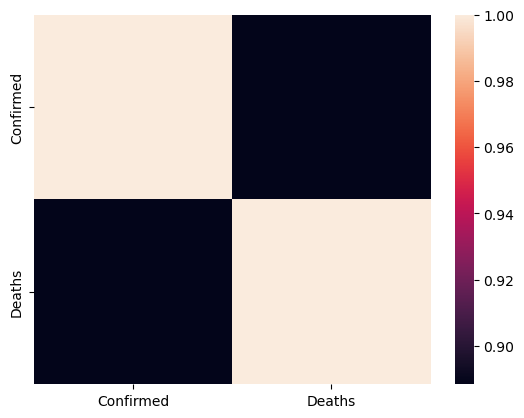

In [20]:
# Is there a correlation between the number of confirmed cases and deaths
a[['Confirmed','Deaths']].corr()
sns.heatmap(a[['Confirmed','Deaths']].corr())

<Axes: >

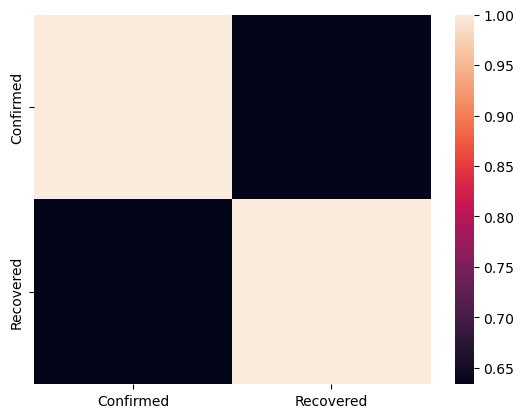

In [21]:
# Is there a correlation between the number of confirmed cases and recovered cases
a[['Confirmed','Recovered']].corr()
sns.heatmap(a[['Confirmed','Recovered']].corr())

<Axes: xlabel='Confirmed', ylabel='Count'>

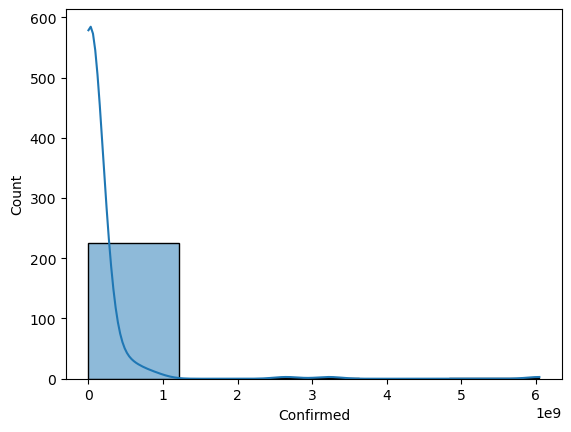

In [91]:
# What is the distribution of confirmed cases by country/region
country_cases = a.groupby('Country/Region')['Confirmed'].sum().reset_index()
sns.histplot(data=country_cases, x='Confirmed', bins=5, kde=True)

In [81]:
# How does the mortality rate vary across different countries/regions
country_data = a.groupby('Country/Region')[['Confirmed', 'Deaths']].sum().reset_index()
country_data = country_data[country_data['Confirmed'] > 0]
country_data['Mortality Rate (%)'] = (country_data['Deaths'] / country_data['Confirmed']) * 100
country_data_sorted = country_data.sort_values(by='Mortality Rate (%)', ascending=False)
country_data_sorted.head(100)

,Country/Region,Confirmed,Deaths,Mortality Rate (%)
225,Yemen,962066.0,237613.0,24.698202
123,MS Zaandam,3824.0,848.0,22.175732
220,Vanuatu,406.0,39.0,9.605911
137,Mexico,460463678.0,43005509.0,9.339609
197,Sudan,7632455.0,488709.0,6.403038
...,...,...,...,...
143,Morocco,104557135.0,1823724.0,1.744237
35,Cameroon,11346589.0,197906.0,1.744189
109,Kenya,27728648.0,482736.0,1.740929
12,Austria,97965875.0,1678309.0,1.713157


In [89]:
# How does the recovery rate vary across different countries/regions
country_data = a.groupby('Country/Region')[['Confirmed', 'Recovered']].sum().reset_index()
country_data = country_data[country_data['Confirmed'] > 0]
country_data['Recovery Rate (%)'] = (country_data['Recovered'] / country_data['Confirmed']) * 100
country_data_sorted = country_data.sort_values(by='Recovery Rate (%)', ascending=False)
country_data_sorted.head(100)

,Country/Region,Confirmed,Recovered,Recovery Rate (%)
219,Uzbekistan,22207571.0,21035683.0,94.723025
78,Ghana,20784664.0,19586296.0,94.234364
55,Diamond Princess,306872.0,288580.0,94.039209
138,Micronesia,129.0,121.0,93.798450
95,Iceland,1729527.0,1621682.0,93.764480
...,...,...,...,...
97,Indonesia,265186050.0,226416174.0,85.380122
151,Nigeria,33407947.0,28514090.0,85.351219
150,Niger,1047041.0,892393.0,85.229996
172,Russia,930548849.0,790705716.0,84.971973


<Axes: title={'center': 'New Confirmed Cases Over Time Globally'}, xlabel='ObservationDate', ylabel='Confirmed'>

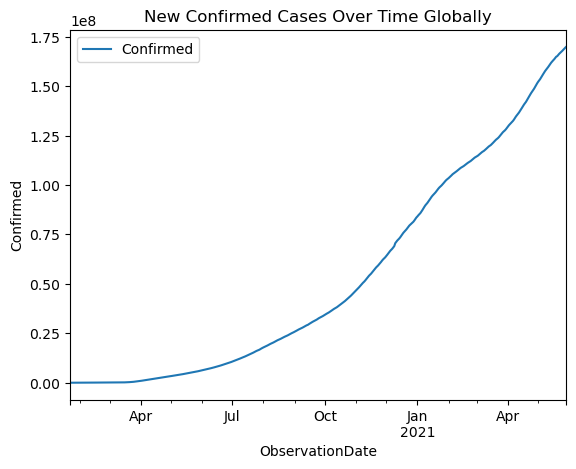

In [93]:
# What is the trend of new confirmed cases over time globally
a['ObservationDate'] = pd.to_datetime(a['ObservationDate'])
df_grouped = a.groupby('ObservationDate')['Confirmed'].sum().reset_index()
df_grouped.sort_values('ObservationDate')
df_grouped.plot(x='ObservationDate', y='Confirmed', title='New Confirmed Cases Over Time Globally', xlabel='ObservationDate', ylabel='Confirmed')

In [95]:
# How does the fatality rate vary across different provinces/states
country_data = a.groupby('Province/State')[['Confirmed', 'Deaths']].sum().reset_index()
country_data = country_data[country_data['Confirmed'] > 0]
country_data['Mortality Rate (%)'] = (country_data['Deaths'] / country_data['Confirmed']) * 100
country_data_sorted = country_data.sort_values(by='Mortality Rate (%)', ascending=False)
country_data_sorted.head(100)

,Province/State,Confirmed,Deaths,Mortality Rate (%)
668,Unknown,8022663.0,4258506.0,53.080953
568,"Santa Rosa County, FL",5.0,2.0,40.000000
338,"Lee County, FL",6.0,2.0,33.333333
213,"Grant County, WA",5.0,1.0,20.000000
52,Baja California,10661120.0,1808573.0,16.964193
...,...,...,...,...
492,Perm Krai,9426150.0,341592.0,3.623876
601,Sormland,3171168.0,114559.0,3.612518
171,England,666227518.0,24042130.0,3.608697
95,Caqueta,4000046.0,144258.0,3.606409


In [97]:
# How does the recovery rate vary across different provinces/states
country_data = a.groupby('Province/State')[['Confirmed', 'Recovered']].sum().reset_index()
country_data = country_data[country_data['Confirmed'] > 0]
country_data['Recovery Rate (%)'] = (country_data['Recovered'] / country_data['Confirmed']) * 100
country_data_sorted = country_data.sort_values(by='Recovery Rate (%)', ascending=False)
country_data_sorted.head(100)

,Province/State,Confirmed,Recovered,Recovery Rate (%)
656,US,5.0,532.0,10640.000000
668,Unknown,8022663.0,619498477.0,7721.855910
527,Repatriated Travellers,2431.0,2431.0,100.000000
549,"Saint Helena, Ascension and Tristan da Cunha",882.0,863.0,97.845805
494,Piaui,46545813.0,45137476.0,96.974299
...,...,...,...,...
81,Bryansk Oblast,7290010.0,6680312.0,91.636527
246,Hong Kong,2657986.0,2434024.0,91.573996
698,Voronezh Oblast,14490195.0,13267047.0,91.558789
178,Falkland Islands (Malvinas),11512.0,10533.0,91.495830


Text(0, 0.5, 'Number of Recovered Cases')

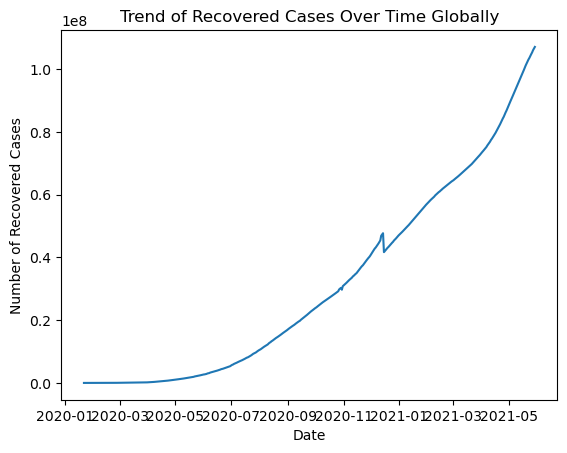

In [115]:
# What is the trend of Recovered cases over time globally
a['ObservationDate'] = pd.to_datetime(a['ObservationDate'])
global_trend = a.groupby('ObservationDate')['Recovered'].sum().reset_index()
plt.plot(global_trend['ObservationDate'], global_trend['Recovered'])
plt.title('Trend of Recovered Cases Over Time Globally')
plt.xlabel('Date', fontsize=10)
plt.ylabel('Number of Recovered Cases', fontsize=10)